<a href="https://colab.research.google.com/github/khac/DevSOM/blob/master/Dev1_learning_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
!pip install minisom
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt


  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=4287ceca5531792ea55844a8973e7aee94819ed6530532ce064a8128f2589450
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [0]:
def mnist_data_assignment():
  """
  :return: X,y is the MNIST dataset containing the 70,000 digits and corresponding labels
  :rtype: numpy.ndarray,numpy.ndarray
  """
  X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
  X = X / 255.
  return X,y

In [0]:
X,y = mnist_data_assignment()


In [0]:
X.shape

(70000, 784)

In [0]:
X_600, y_600, X_6000, y_6000 = [], [], [], []

for i in range(10):
  X_600.append(X[y==str(i)][:60])
  y_600 += [str(i)]*60
  X_6000.append(X[y==str(i)][:600])
  y_6000 += [str(i)]*600

X_600 = np.array(X_600).reshape(600,784)
X_6000 = np.array(X_6000).reshape(6000,784)
y_600 = np.array(y_600) 
y_6000 = np.array(y_6000)

In [0]:
np.random.seed(0)
np.random.shuffle(X_600)
np.random.seed(0)
np.random.shuffle(X_6000)
np.random.seed(0)
np.random.shuffle(y_600)
np.random.seed(0)
np.random.shuffle(y_6000)

In [0]:
sigma6 = 'sigma6'; sigma12 = 'sigma12'; sigma24 = 'sigma24';
tau6 = 'tau6'; tau12 = 'tau12'; tau24 = 'tau24';

PARAM ={sigma6:3.0,     tau6:0.1,
        sigma12:2.25,    tau12:0.05,
        sigma24:3.0,    tau24:0.1}

X_train = X[:60000]; y_train = y[:60000]; X_test = X[60000:70000]; y_test = y[60000:70000] 

In [0]:
import time

In [0]:
from minisom import MiniSom    
start_time = time.time()
som_24x24 = MiniSom(24, 24, 784, sigma=PARAM[sigma6], learning_rate=PARAM[tau6]) # initialization of 12x12 SOM
som_24x24.train_random(X_train, 900000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

 [ 533238 / 900000 ]  59% - 0:41:05 left 

KeyboardInterrupt: ignored

In [0]:
from minisom import MiniSom    
start_time = time.time()
som_12x12 = MiniSom(12, 12, 784, sigma=PARAM[sigma12], learning_rate=PARAM[tau12]) # initialization of 12x12 SOM
som_12x12.train_random(X_train, 600000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

 [ 188566 / 600000 ]  31% - 0:10:31 left 

In [0]:
from minisom import MiniSom    
start_time = time.time()
som_6x6 = MiniSom(6, 6, 784, sigma=PARAM[sigma6], learning_rate=PARAM[tau6]) # initialization of 12x12 SOM
som_6x6.train_random(X_train, 300000, verbose=True) # trains the SOM with 100 iterations
print("--- %s seconds ---" % (time.time() - start_time))

# Weights of the SOFM

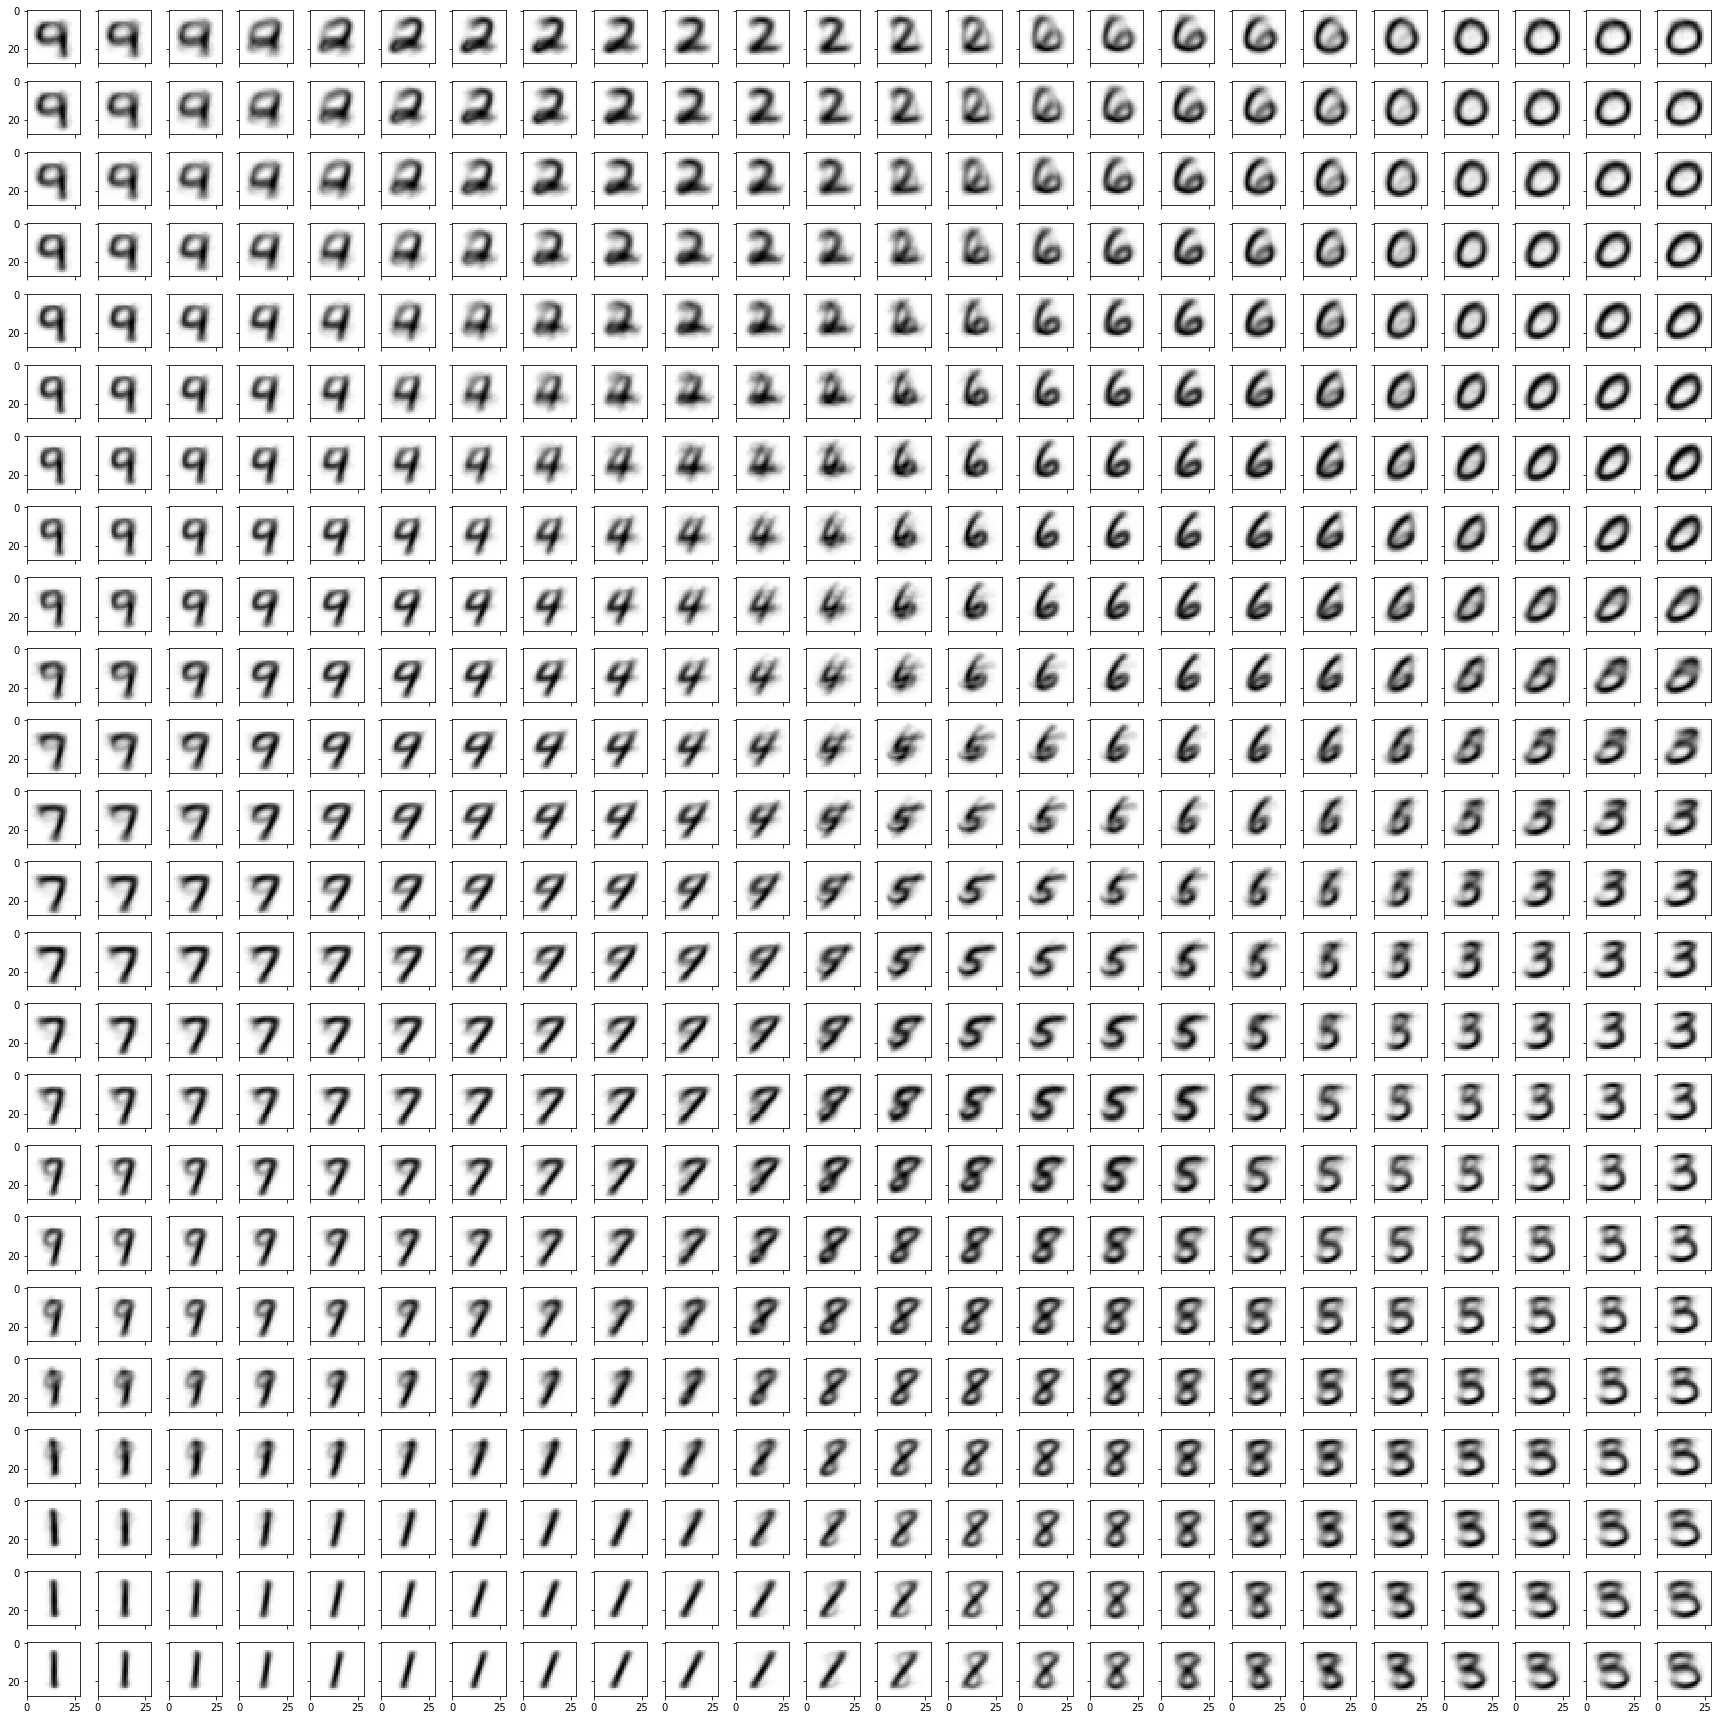

In [0]:
weight_developed = som_direct_600.get_weights().reshape(24*24,28,28).copy()
ig, axes = plt.subplots(24,24, 
                         figsize=(24,24),
                         sharex=True, sharey=True)

for i in range(24*24):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//24 
    subplot_col = i%24  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = weight_developed[i]
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

# Entropy Heatmap

In [0]:
def dict_for_entropy(som, X, y):
  dict_winner_neuron = {}
  for i in range(10):
    x_i = y==str(i)
    for x, t in zip(X[x_i], y[x_i]):  # scatterplot
        w = som.winner(x)
        if w not in dict_winner_neuron:
          dict_winner_neuron[w] = {}
          if i not in dict_winner_neuron[w]:
            dict_winner_neuron[w][i] = 1
        elif i not in dict_winner_neuron[w]:
          dict_winner_neuron[w][i] = 1
        else:
          dict_winner_neuron[w][i] += 1
  return dict_winner_neuron

In [0]:
import plotly.express as px

def heatmap_entropy(dict_winner_neuron, size):
  map_132 = pd.DataFrame(np.zeros((size, size)), index=range(0,size), columns=range(0,size))
  for i in dict_winner_neuron:
      _sum_winner_neuron = sum(dict_winner_neuron[i].values())
      digits = list(dict_winner_neuron[i].values())
      map_132[i[0]][i[1]] = sum([-(j/_sum_winner_neuron)*np.log(j/_sum_winner_neuron) for j in digits])
    
  if size<12:
    z_text = np.around(map_132.values, decimals=3)
    fig = ff.create_annotated_heatmap(z = map_132.values, annotation_text=z_text, colorscale='hot', showscale=True, zmin=0, zmax=2, reversescale=True)
    fig.update_layout(
      autosize=False,
      width= 75*size if 75*size < 900 else 900 ,
      height=75*size if 75*size < 900 else 900)
    fig.show()
  else:
      num = list(range(1, size+1))
      fig1 = go.Figure(data=go.Heatmap(z=map_132.values, x=[], y=[], colorscale='hot', showscale=True, zmin=0, zmax=2, reversescale=True ))
      fig1.update_layout(
        autosize=False,
        width=900 ,
        height=900)
      fig1.show()


In [0]:
dict_winner_neuron = dict_for_entropy(som_direct_600, X, y)
print(dict_winner_neuron)
heatmap_entropy(dict_winner_neuron, 24)

{(5, 22): {0: 63, 9: 1}, (5, 23): {0: 246, 2: 3, 7: 1}, (8, 20): {0: 86, 2: 5, 5: 5, 6: 12, 8: 1}, (7, 20): {0: 91, 2: 1, 6: 7, 9: 1}, (3, 22): {0: 49, 2: 3, 6: 2}, (0, 21): {0: 259, 3: 1, 8: 1, 9: 4}, (0, 20): {0: 256, 3: 2, 5: 2, 8: 4, 9: 1}, (5, 19): {0: 125, 2: 1, 6: 7, 8: 3, 9: 1}, (6, 20): {0: 100, 6: 1, 9: 1}, (5, 20): {0: 137, 2: 2, 8: 1, 9: 3}, (2, 23): {0: 260, 4: 1, 6: 1, 7: 1}, (3, 20): {0: 162, 5: 1, 7: 1, 8: 1}, (6, 23): {0: 258, 2: 1, 6: 1}, (0, 23): {0: 420, 6: 3, 7: 1, 9: 1}, (4, 19): {0: 160, 2: 3, 3: 1, 5: 3, 6: 1, 8: 2}, (0, 22): {0: 184, 3: 1, 5: 1, 6: 1}, (2, 19): {0: 160, 2: 4, 5: 4, 8: 1}, (20, 22): {0: 1, 2: 2, 3: 34, 5: 27, 8: 5}, (7, 13): {0: 4, 4: 2, 5: 1, 6: 114}, (3, 19): {0: 215, 2: 3, 3: 1, 5: 5, 6: 2, 7: 1}, (23, 23): {0: 11, 2: 1, 3: 35, 5: 189, 6: 3, 8: 104, 9: 4}, (11, 13): {0: 12, 3: 9, 5: 112, 6: 3, 7: 1, 8: 6}, (4, 21): {0: 88, 2: 4, 5: 2, 6: 1, 9: 1}, (4, 20): {0: 152, 2: 1, 5: 3}, (3, 21): {0: 76, 2: 2, 3: 1, 6: 1, 9: 2}, (1, 23): {0: 158, 5: 1,

# Normalized Metric

In [0]:
def m_xy(winner_neurons_dict):
  return_dict = {}
  for i in winner_neurons_dict.keys():
    x = 0 
    for j in winner_neurons_dict[i].keys():
      x += winner_neurons_dict[i][j]
    return_dict[i] = x
  return return_dict
    

In [0]:
def normalized_metric(winner_neurons_dict, num_elements_per_class):
  m_xy1 = m_xy(winner_neurons_dict)
  return_dict, p_xy, q_xy, pq_xy = {}, {}, {}, {}
  for i in winner_neurons_dict.keys():
    if i not in p_xy:
      p_xy[i] = {}
    if i not in q_xy:
      q_xy[i] = {}
    if i not in pq_xy:
      pq_xy[i] = {}
    for j in winner_neurons_dict[i].keys():
      if j not in p_xy:
        p_xy[i][j] = float(winner_neurons_dict[i][j])/float(num_elements_per_class[j])
      if j not in q_xy:
        q_xy[i][j] = float(winner_neurons_dict[i][j])/float(m_xy1[i])
      if j not in pq_xy:
        pq_xy[i][j] = p_xy[i][j]*q_xy[i][j]
      if j not in return_dict:
        return_dict[j] = pq_xy[i][j]
      return_dict[j] += pq_xy[i][j]
  ret_val = 0
  for i in return_dict:
    ret_val += return_dict[i]
  return ret_val/len(return_dict.keys())


In [0]:
num_elements_per_class_train = {}
num_elements_per_class_test = {}
for j in range(10):
  x = 0
  for i in y_train==str(j):
    if i:
      x += 1
  num_elements_per_class_train[j]=x
  x = 0
  for i in y_test==str(j):
    if i:
      x += 1
  num_elements_per_class_test[j]=x

In [0]:
dict_winner_neuron_train_600 = dict_for_entropy(som_direct_600,  X_train,  y_train)
dict_winner_neuron_test_600  = dict_for_entropy(som_direct_600,  X_test,   y_test)

In [0]:
dict_winner_neuron_train_6000 = dict_for_entropy(som_direct_6000,  X_train,  y_train)
dict_winner_neuron_test_6000  = dict_for_entropy(som_direct_6000,  X_test,   y_test)

In [0]:
print(normalized_metric(dict_winner_neuron_train_600, num_elements_per_class_train), 
      normalized_metric(dict_winner_neuron_test_600, num_elements_per_class_test))
print(normalized_metric(dict_winner_neuron_train_6000, num_elements_per_class_train), 
      normalized_metric(dict_winner_neuron_test_6000, num_elements_per_class_test))

0.6548883842092226 0.6606258470392505
0.750482277893369 0.7759644305631156


# **Classification Metrics**

For each neuron, assign it the class it gets activated, this will be a dict,

with key - as tuple (x, y) of the location of neuron on the grid, whereas, value will be the class value for which it gets activated the most

---

Now, traverse through X_test and 

create two lists y_true and y_pred depending 

on the location on the grid (x, y) where the X_test gets activated

---

Get the confusion matrix, accuracy, precision and recall values

In [0]:
def majority_class_neuron(winner_neuron_dict):
  majority_dict = {}
  for location in winner_neuron_dict:
    majority_dict[location] = max(winner_neuron_dict[location], key=winner_neuron_dict[location].get)
  return majority_dict

In [0]:
def classification_metric(winner_neuron_dict, som, X_test):
  y_pred = []
  majority_class_nron = majority_class_neuron(winner_neuron_dict)
  for x_i in X_test:
    location = som.winner(x_i)
    y_pred.append(str(majority_class_nron[location]))
  return y_pred


In [0]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score as accuracy

y_pred_som_600 = classification_metric(dict_winner_neuron_train_600, som_direct_600, X_test)
print(cm(y_test, y_pred_som_600), '\n', cr(y_test, y_pred_som_600), '\n', accuracy(y_test, y_pred_som_600))

KeyError: ignored

In [0]:
y_pred_som_6000 = classification_metric(dict_winner_neuron_train_6000, som_direct_6000, X_test)
print(cm(y_test, y_pred_som_6000), '\n', cr(y_test, y_pred_som_6000), '\n', accuracy(y_test, y_pred_som_6000))

In [0]:
def confusion_matrix_training(dict_winner):
  confusion_matrix = [[0 for i in range(10)] for j in range(10)]
  majority_class_nron = majority_class_neuron(dict_winner)
  for location in dict_winner:
    i = majority_class_nron[location]
    for j in dict_winner[location]:
      confusion_matrix[i][j] += dict_winner[location][j]
  i, j = 0, 0
  num, den = 0, 0
  for i in range(10):
    for j in range(10):
      if i==j:
        num += confusion_matrix[i][j]
      else:
        den += confusion_matrix[i][j]
      
  print(num/(num+den), confusion_matrix)
  return
    

In [0]:
print(confusion_matrix_training(dict_winner_neuron_train))

0.86155 [[5612, 3, 61, 15, 5, 75, 153, 20, 55, 26], [2, 6600, 67, 35, 46, 20, 11, 121, 98, 18], [38, 40, 5292, 143, 67, 36, 38, 42, 85, 21], [26, 26, 115, 5160, 8, 314, 20, 5, 411, 73], [9, 8, 35, 13, 4036, 29, 16, 89, 47, 615], [105, 4, 23, 350, 20, 4620, 98, 11, 380, 36], [103, 12, 43, 11, 117, 97, 5575, 1, 50, 33], [3, 16, 117, 66, 135, 15, 1, 5599, 64, 392], [23, 22, 197, 292, 14, 175, 6, 8, 4564, 100], [2, 11, 8, 46, 1394, 40, 0, 369, 97, 4635]]
None
